In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

 Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [2]:
import requests
import requests_cache

def fetch_page(url):
    response = requests.get(url)
    # Throw an error if status isn't 200 OK.
    response.raise_for_status()
    return response

In [3]:
def all_pages(url,number):
    """
    This function is to produce a list of urls
    Input: url string; number integer
    Output: all urls list
    """
    if number == 1:
        urls = url
    if number >1:
        urls = [url+"page/"+str(i)+"/" for i in range(number+1)[2:]]
        urls.insert(0, url)
    return urls

In [4]:
import lxml.html as lx
import pandas as pd
import re #for regular expression
def parse_page(page):
    """
    This function is to parse all useful information from the page
    Input: page
    Output: a table of article titles and urls DataFrame
    """
    html = lx.fromstring(page.text)
    a = html.cssselect("h2>a")
    articles = [re.sub(r'Permanent Link to ', '',x.get("title").strip("")) for x in a]
    urls = [x.get("href") for x in a]
    return pd.DataFrame({"articles": articles, "url": urls})

In [5]:
def final_list(url, number = 1):
    urls = all_pages(url, number)
    if number == 1:
        page = fetch_page(urls)
        data = parse_page(page)
    if number > 1:
        data = []
        for url in urls:
            page = fetch_page(url)
            data.append(parse_page(page))
        data = pd.concat(data,ignore_index=True)

    return (data, list(data["url"]))

In [6]:
url1 = "https://theaggie.org/arts/"
xx1, urls1 = final_list(url1)
urls1

['https://theaggie.org/2017/02/23/sacramentos-artstreet-exhibit-showcases-diverse-artwork/',
 'https://theaggie.org/2017/02/23/armadillo-kdvs-collaborate-to-host-vinyl-and-music-fair/',
 'https://theaggie.org/2017/02/23/harlows-nightclub-presents-khalid/',
 'https://theaggie.org/2017/02/21/late-night-eats-in-davis/',
 'https://theaggie.org/2017/02/21/2017-oscar-nominations-and-predictions/',
 'https://theaggie.org/2017/02/20/student-sounds-samantha-sipin/',
 'https://theaggie.org/2017/02/20/tv-revisited-the-office/',
 'https://theaggie.org/2017/02/19/uc-davis-theater-and-dance-presents-its-newest-comedy/',
 'https://theaggie.org/2017/02/19/twenty-one-pilots-emotional-roadshow-world-tour/',
 'https://theaggie.org/2017/02/16/a-night-under-the-stars/',
 'https://theaggie.org/2017/02/14/critically-acclaimed-stand-up-comic-brian-regan-to-perform-at-mondavi-center/',
 'https://theaggie.org/2017/02/13/burning-love-parody-of-the-bachelor/',
 'https://theaggie.org/2017/02/12/the-bachelor-engage

In [7]:
url2 = "https://theaggie.org/sports/"
xx2, urls2 = final_list(url2)
urls2

['https://theaggie.org/2017/02/24/uc-davis-back-on-track-with-win-over-matadors/',
 'https://theaggie.org/2017/02/24/aggie-womens-basketball-team-says-neigh-to-mustangs/',
 'https://theaggie.org/2017/02/23/the-amazeing-aggies/',
 'https://theaggie.org/2017/02/23/uc-davis-womens-water-polo-dominates-aggie-shootout/',
 'https://theaggie.org/2017/02/23/womens-gymnastics-take-two/',
 'https://theaggie.org/2017/02/21/what-are-your-thoughts-on-uc-davis-athletics/',
 'https://theaggie.org/2017/02/20/a-day-in-the-life-of-an-athletic-trainer/',
 'https://theaggie.org/2017/02/19/a-lifetime-of-tennis/',
 'https://theaggie.org/2017/02/17/uc-davis-womens-basketball-team-holds-off-uc-irvine-62-42/',
 'https://theaggie.org/2017/02/17/nba-awards-at-the-all-star-break/',
 'https://theaggie.org/2017/02/17/womens-lacrosse-soars-over-the-blackbirds/',
 'https://theaggie.org/2017/02/17/uc-davis-womens-lacrosse-falls-in-tough-season-opener/',
 'https://theaggie.org/2017/02/16/uc-davis-softball-falls-in-home

In [8]:
url3 = "https://theaggie.org/sciencetech/"
xx3, urls3 = final_list(url3,3)
urls3

['https://theaggie.org/2017/02/23/uc-davis-offers-scientific-marijuana-course-for-undergraduate-students/',
 'https://theaggie.org/2017/02/23/arboretum-waterway-restoration-project-underway/',
 'https://theaggie.org/2017/02/21/looking-for-life-on-other-planets/',
 'https://theaggie.org/2017/02/21/serious-health-effects-linked-to-agent-orange-exposure/',
 'https://theaggie.org/2017/02/20/fossil-discovery-provides-new-evidence-to-life-after-mass-extinction/',
 'https://theaggie.org/2017/02/19/h0licow-collaborations-and-the-expanding-universe/',
 'https://theaggie.org/2017/02/16/closing-the-drapes-on-vapes/',
 'https://theaggie.org/2017/02/13/moth-species-named-after-newly-elected-president/',
 'https://theaggie.org/2017/02/09/autism-spectrum-disorder-the-latest-hack/',
 'https://theaggie.org/2017/02/09/coders-at-datarescuedavis-archive-federal-at-risk-databases/',
 'https://theaggie.org/2017/02/07/a-powerhouse-in-the-making/',
 'https://theaggie.org/2017/02/02/better-bee-lieve-it-uc-davi

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [9]:
def fetch_text(url):
    page = fetch_page(url)
    html = lx.fromstring(page.text)
    title = html.cssselect("main>article>header>h1")[0].text_content()
    text = html.cssselect("article")[0].cssselect("p")
    article = "".join([x.text_content() for x in text[:-1]])
    if not all(ord(char) < 128 for char in article):
        article = article.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 }) 
    if len(re.findall(r"(.+?)Written", text[-1].text_content())) ==1:
        article = article + re.findall(r"(.+?)Written", text[-1].text_content())[0]
    if len(re.findall(r"Written(.+)", text[-1].text_content())) ==1:
        author = "Written"+re.findall(r"Written(.+)", text[-1].text_content())[0]
    else:
        author = "NaN"
    return {"author": author, "text": article, "title": title, "url": url}

In [10]:
url = "https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/"
fetch_text(url)

{'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
 'text': u'Davis residents create financial model to make city\'s financial state more transparentTo increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto e

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [194]:
url_city = "https://theaggie.org/city/"
url_campus = "https://theaggie.org/campus/"
data_city, urls_city = final_list(url_city, 4)
data_campus, urls_campus = final_list(url_campus, 4)
article_city = pd.DataFrame([fetch_text(url) for url in urls_city])
article_city["category"] = "City News"
article_campus = pd.DataFrame([fetch_text(url) for url in urls_campus])
article_campus["category"] = "Campus News"
result = pd.concat([article_city,article_campus], ignore_index=True)
result

,author,text,title,url,category
0,Written by: Kaelyn Tuermer-Lee — city@theaggie...,Local Whole Foods closes Feb. 12After five yea...,Davis’ Whole Foods Market shuts down,https://theaggie.org/2017/02/23/davis-whole-fo...,City News
1,Written By: Anya Rehon — city@theaggie.org,Demonstrations take place at hundreds of Plann...,Protest against Planned Parenthood in Woodland...,https://theaggie.org/2017/02/23/protest-agains...,City News
2,Written By: Bianca Antunez — city@theaggie.org,California Redevelopment Agencies require Davi...,Davis’s Historic City Hall building to be put ...,https://theaggie.org/2017/02/23/daviss-histori...,City News
3,Written by: Caitlyn Sampley — city@theaggie.org,Davis residents show solidarity in wake of tra...,Davis stands with Muslim residents,https://theaggie.org/2017/02/21/davis-stands-w...,City News
4,Written By: Anya Rehon — city@theaggie.org,"CalRecycle donates $197,851The City of Davis w...",City of Davis awarded funds for new recycling ...,https://theaggie.org/2017/02/20/city-of-davis-...,City News
5,Written by: Sam Solomon — city@theaggie.org,"The world is a weird placeFeb. 6""Chronic phone...",Police Logs,https://theaggie.org/2017/02/19/police-logs-12/,City News
6,Written by: Raul Castellanos Jr — city@theaggi...,Mayor Robb Davis reaffirms that the City of Da...,City of Davis to retain sanctuary city status,https://theaggie.org/2017/02/16/city-of-davis-...,City News
7,Written by: Samantha Solomon — city@theaggie.org,Davis resident Lauren Kirk-Coehlo arrested in ...,Suspect in Davis Islamic Center vandalism arre...,https://theaggie.org/2017/02/15/suspect-in-dav...,City News
8,Written By: Bianca Antunez — city@theaggie.org,Davis residents create financial model to make...,Project Toto aims to address questions regardi...,https://theaggie.org/2017/02/14/project-toto-a...,City News
9,Written by: Kaelyn Tuermer-Lee — city@theaggie...,"Something smells fishyJan. 29 ""Loud music or T...",Police Logs,https://theaggie.org/2017/02/13/police-logs-11/,City News


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [139]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [75]:
stemmer = PorterStemmer().stem
tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    s = re.sub(r'[^\w\s]','',text) #remove all punctuation
    return stem(tokenize(s))

In [83]:
def tf(x):
    """
    This fuction is to get tfs matrix
    Input: list of string
    Output: matrix
    """
    vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
    tfs = vectorizer.fit_transform(x)
    return tfs

### For the total data

In [129]:
tf1 = tf(result["text"])
index = [(tf1[i].toarray()).argsort()[0][-20:] for i in range(120)]
keywords = [[vectorizer.get_feature_names()[i] for i in j] for j in index]

In [196]:
keywordframe = pd.DataFrame(keywords)
f = lambda x,y: x+y
rawkeywords = reduce(f, keywords)
Counter(rawkeywords).most_common(20)

[(u'davi', 36),
 (u'student', 32),
 (u'uc', 24),
 (u'wa', 20),
 (u'event', 13),
 (u'citi', 11),
 (u'asucd', 11),
 (u'senat', 11),
 (u'hi', 10),
 (u'protest', 9),
 (u'counti', 8),
 (u'said', 8),
 (u'support', 8),
 (u'program', 7),
 (u'famili', 7),
 (u'food', 7),
 (u'research', 7),
 (u'grant', 7),
 (u'yolo', 7),
 (u'state', 7)]

The topics the Aggie covers most is UC Davis Student.

### for campus news

#### 1. Use the dfs matrix of total data (divide keywords into to parts evently)

In [162]:
rawkeywords_campus = reduce(f, keywords[60:])
campus_selected = dict(Counter(rawkeywords_campus).most_common(20))
campuskey = campus_selected.keys()

#### 2. Use the dfs matrix of campus data then repeat the procedure for total data to get the keywords

In [168]:
tf2 = tf(article_campus["text"])
index2 = [(tf2[i].toarray()).argsort()[0][-20:] for i in range(60)]
keywords2 = [[vectorizer.get_feature_names()[i] for i in j] for j in index2]
keywordframe2 = pd.DataFrame(keywords2)
f = lambda x,y: x+y
rawkeywords2 = reduce(f, keywords2)
campuskeys = Counter(rawkeywords2).most_common(20)

### for city news

#### 1. Use the dfs matrix of total data (divide keywords into to parts evently)

In [163]:
rawkeywords_city = reduce(f, keywords[:60])
city_selected = dict(Counter(rawkeywords_city).most_common(20))
citykey = city_selected.keys()

#### 2. Use the dfs matrix of campus data then repeat the procedure for total data to get the keywords

In [169]:
tf3 = tf(article_city["text"])
index3 = [(tf3[i].toarray()).argsort()[0][-20:] for i in range(60)]
keywords3 = [[vectorizer.get_feature_names()[i] for i in j] for j in index3]
keywordframe3 = pd.DataFrame(keywords3)
f = lambda x,y: x+y
rawkeywords3 = reduce(f, keywords3)
citykeys = Counter(rawkeywords3).most_common(20)

### Comparison

#### 1. Gain the intersection of method 1

In [176]:
print campus_selected , city_selected

{u'hi': 6, u'committe': 5, u'said': 7, u'asucd': 11, u'wa': 13, u'faculti': 5, u'univers': 6, u'research': 6, u'environment': 5, u'cancel': 5, u'protest': 6, u'napolitano': 6, u'uc': 24, u'student': 26, u'vote': 6, u'yiannopoulo': 6, u'regent': 5, u'senat': 11, u'event': 7, u'davi': 14} {u'counti': 8, u'servic': 4, u'famili': 5, u'wa': 7, u'grant': 5, u'food': 6, u'light': 5, u'support': 5, u'yolo': 7, u'children': 4, u'event': 6, u'downtown': 6, u'citi': 9, u'program': 4, u'student': 6, u'sacramento': 5, u'peopl': 4, u'holiday': 5, u'public': 6, u'davi': 22}


In [164]:
set(campuskey) & set(citykey)

{u'davi', u'event', u'student', u'wa'}

#### 2. Gain the intersection of method 2

In [175]:
print campuskeys, citykeys

[(u'nonmuslim', 18), (u'measur', 17), (u'bysa', 15), (u'overallth', 14), (u'adjac', 11), (u'khadeja', 8), (u'leg', 7), (u'compensationth', 7), (u'maritim', 6), (u'discov', 6), (u'outrag', 6), (u'person', 6), (u'ilanthiraian', 6), (u'communityhim', 5), (u'amid', 5), (u'issueour', 5), (u'intactthes', 5), (u'consum', 4), (u'level', 4), (u'enterpris', 4)] [(u'californian', 26), (u'bath', 9), (u'lone', 8), (u'communicationsth', 7), (u'negoti', 7), (u'breast', 7), (u'onemil', 7), (u'honore', 6), (u'councillast', 6), (u'charter', 5), (u'introspect', 5), (u'luther', 5), (u'dilig', 5), (u'judg', 5), (u'confid', 5), (u'himjan', 5), (u'daylightth', 5), (u'equal', 5), (u'bhatti', 4), (u'antioxid', 4)]


In [170]:
set(campuskeys) & set(citykeys)

set()

1. Method 1
   
   The key words of campus are "uc student davi", key words of city are "davi citi counti".
2. Method 2
   
   The key words of campus are "nonmuslim measur bysa", key words of city are "californian bath lone".
   
Of these 20 key words, there are only 4 same words. So we think they cover different topics.

It is easy to find that the results of these two methods are totally different. I guess that changing of corpus causes the changing of weight of every word so this phenonmena happened. What's more, I check the most common words finding by method 2, they are totally different from keywords in the list of total data. Thus I think first method is more meaningful.

So I draw the Barplot of list gaining by method 1.

In [158]:
def show_figure(x):
    a = pd.DataFrame.from_dict(dict(Counter(x).most_common(20)), orient='index', dtype=None)
    a['word']=a.index
    a.index = range(20)
    a.columns = ["number","word"]
    sns.barplot(x = "number",y = "word",data = a)
    plt.title('Barplot of words')
    return plt.show()

#### Barplot for campus data

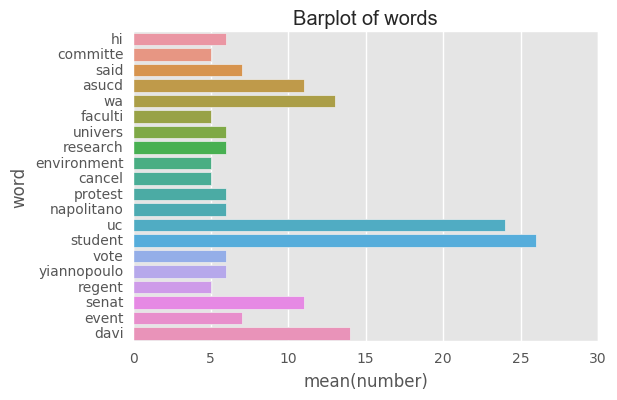

In [159]:
show_figure(rawkeywords_campus)

#### Barplot for city data

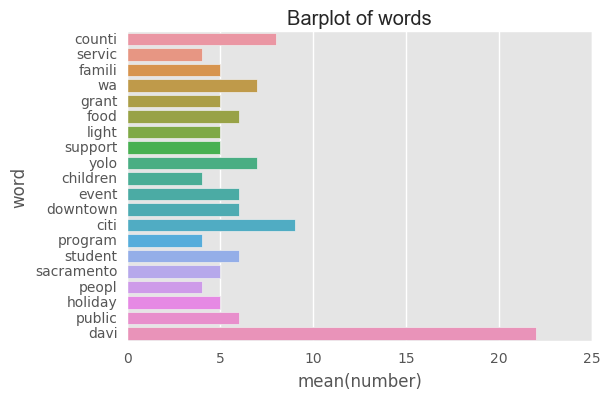

In [160]:
show_figure(rawkeywords_city)

### Find similar articles

In [171]:
sim = cosine_similarity(tf1)
sim = np.triu(sim,1)

In [127]:
max_pair = sim.argsort(axis = None)[-3:]
nrow = max_pair//120
ncol = max_pair%120
[(nrow[i], ncol[i]) for i in [2,1,0]]

[(74, 95), (111, 118), (84, 98)]

In [177]:
list(result["title"][[74,95,111,118,84,98]])

['UC Davis holds first mental health conference',
 'UC Davis to host first ever mental health conference',
 'Protests erupt at Milo Yiannopoulos event',
 'Davis College Republicans club leads protest against cancellation of Milo Yiannopoulos event',
 'University of California Regents meet, approve first tuition raise in six years',
 'UC Regents vote to raise tuition for UC campuses']

The titles of them are 

('UC Davis holds first mental health conference','UC Davis to host first ever mental health conference'),

('Protests erupt at Milo Yiannopoulos event','Davis College Republicans club leads protest against cancellation of Milo Yiannopoulos event'),

('University of California Regents meet, approve first tuition raise in six years','UC Regents vote to raise tuition for UC campuses'). 

The words(lemma) that each pair have in common diaplay below.

In [184]:
from nltk.corpus import stopwords
def filtered_words(text):
    return [w for w in text if not w in stopwords.words('english')]

In [185]:
s=[filtered_words(lemmatize(text)) for text in result["text"][[74,95,111,118,84,98]]]
sets = [set(x) for x in s]

In [190]:
print sets[0] & sets[1]

set([u'help', u'founder', u'text', u'month', u'involv', u'group', u'lgbtqia', u'monica', u'break', u'psychologist', u'tri', u'administr', u'organ', u'gender', u'panelist', u'crisi', u'two', u'prevent', u'set', u'mental', u'realli', u'close', u'beyond', u'juliet', u'spiritu', u'abl', u'health', u'approach', u'porter', u'full', u'wa', u'confer', u'destigmat', u'bodi', u'host', u'base', u'come', u'panel', u'thirdyear', u'remark', u'attende', u'place', u'advocaci', u'studi', u'disabl', u'first', u'major', u'three', u'right', u'opportun', u'open', u'select', u'use', u'feb', u'spoke', u'commun', u'suicid', u'workshop', u'advoc', u'includ', u'pm', u'offer', u'forb', u'heal', u'took', u'fund', u'line', u'davi', u'counsel', u'work', u'aim', u'nine', u'psycholog', u'uc', u'150', u'engag', u'applic', u'process', u'want', u'onlin', u'secur', u'perform', u'speaker', u'peopl', u'9', u'attend', u'samantha', u'english', u'director', u'said', u'plan', u'student', u'center', u'well', u'person', u'thi', 

In [191]:
print sets[2] & sets[3]

set([u'claim', u'major', u'crowd', u'danger', u'feel', u'becaus', u'america', u'attend', u'held', u'protest', u'pressur', u'want', u'go', u'milo', u'hate', u'event', u'damag', u'onli', u'said', u'give', u'would', u'start', u'come', u'support', u'univers', u'due', u'jan', u'also', u'black', u'lot', u'sacramento', u'speech', u'speak', u'hat', u'cancel', u'pm', u'make', u'thi', u'wa', u'get', u'read', u'peopl', u'hundr', u'great', u'free', u'back', u'host', u'hi', u'facebook', u'student', u'veri', u'yiannopoulo', u'republican', u'dcr', u'minut', u'davi', u'14', u'protect', u'word', u'like', u'local', u'howev', u'properti', u'violent', u'face', u'matter', u'tour', u'came', u'outsid', u'time', u'colleg', u'went', u'campu', u'page', u'uc'])


In [192]:
print sets[4] & sets[5]

set([u'among', u'336', u'direct', u'gavin', u'hook', u'cost', u'vote', u'26', u'said', u'regent', u'debat', u'jan', u'new', u'282', u'public', u'higher', u'newsom', u'lee', u'wa', u'afford', u'tuition', u'fee', u'let', u'student', u'commit', u'increas', u'sinc', u'alex', u'54', u'servic', u'rais', u'place', u'thi', u'presid', u'california', u'crisi', u'uc', u'first'])


### Evaluate this corpus

1. Presentitive. This data set can kind of represent the Aggie. Because results we get from this corpus are closed to life in Davis. For example, the topics it covering most consist with the reality; the topics of city news and campus news are different. The number of articles is enough for us to analyze.
2. Inference. This corpus can support us to analyze the different article styles of different author because some authors have more than one articles in the corpus. What's more, we can get the frequency of these news. Because the number of each day's articles is different.